*Final project for Quantitative Macroeconomic Theory at Washington University in St. Louis*
# Does the Type of Mortgage Rate Matter? Adjustable Rate and Fixed Rate
## Kam, Yu Fai (Geoffrey); Nemoto, Hiroyuki; and Tanaka, Masaki


## Step 0. Load modules and set parameters

### (A) Load modules

In [30]:
%matplotlib inline
from KNTModel import *
from KNTModel.tools import AR1_process
from KNTModel.model_comparison import compare_irfs
import numpy as np

### (B) Set parameters
#### parameters for the income ($z$) process


In [31]:
N_z = 10     # number of grid points
rho_z = 0.9  # AR1 coefficient
sig_z = 0.1  # size of exogenous shock
bar_z = 3.   # average income level (chosen so that income/mortgage amount ratio is realistic)
Omega_z = 4  # range of grid

#### parameters for the aggregate factor ($x$) process

In [32]:
N_x     = 5    # number of grid points
rho_x   = 0.9  # AR1 coefficient
sig_x   = 0.15 # size of exogenous shock
Omega_x = 3    # range of grid


#### simulated path for $x$ shock simulation

In [33]:
x_path = np.array([4, 3] + [2] * 98)

## Step 1. Discretize the exogenous processes
### (A) Discretize the income ($z$) process

Suppose the log income ($\log z_t$) follows an AR(1) process:
$$
\ln (z_t - \bar{z}) = \rho \ln (z_{t-1} - \bar{z}) + \varepsilon_{z, t}
$$
where $\varepsilon_{z, t} \sim \mathcal{N}(0, \sigma^2_{z})$ and $\bar{z}$ is the average income level.

In [34]:
# Generate the instance for the income process
lnz_process = AR1_process(rho = rho_z,
                          sig = sig_z,
                          varname = 'lnz')
# Discretize by Tauchen's method
lnz_process.discretize(method = 'Tauchen',
                       N = N_z,
                       Omega = Omega_z,
                       is_write_out_result = False)
# Get the grid and the transition probabilities
z_grid = np.exp(lnz_process.lnz_grid) + bar_z
trans_prob_z = lnz_process.trans_mat

Discretizing the AR(1) process by Tauchen method...
Discretization done.


The resulting grid points for $z$ is ...

In [35]:
print(z_grid)

[3.39945149 3.48980994 3.60060804 3.73646936 3.90306337 4.107342
 4.35782974 4.66497938 5.04160822 5.50343286]


### (B) Discretize the aggregate factor ($x$) process

Suppose the log of aggregate factor ($\log x_t$) also follows an AR(1) process:
$$
\ln x_t = \rho \ln x_{t-1} + \varepsilon_{x, t}
$$
where $\varepsilon_{x, t} \sim \mathcal{N}(0, \sigma^2_{x})$.

In our model, this aggregate factor appears as a pricing wedge in the mortgage rate equation. In tuitively, this aggregate shock captures *e.g.* the risk aversion in the banking sector. Thus, higher $x$ is unfavorable for the economy.

In [36]:
# Generate the instance for the aggregate factor process
lnx_process = AR1_process(rho = rho_x,
                          sig = sig_x,
                          varname = 'lnx')
# Discretize by Tauchen's method
lnx_process.discretize(method = 'Tauchen',
                       N = N_x,
                       Omega = Omega_x,
                       is_write_out_result = False)
# Get the grid and the transition probabilities
x_grid = np.exp(lnx_process.lnx_grid)
trans_prob_x = lnx_process.trans_mat

Discretizing the AR(1) process by Tauchen method...
Discretization done.


The resulting grid points for $x$ is ...

In [37]:
print(x_grid)

[0.35616157 0.59679274 1.         1.67562361 2.80771449]


## Step 2. Solve the adjustable-rate model

### (A) Declare the economy

In this economy, the morgage rates for the existing loans vary depending the lender's state.

In [38]:
# Generate the instance for the adjustable-rate economy
ARM_Economy = ARM_FixedHousePrice(z_grid = z_grid,
                                  x_grid = x_grid,
                                  trans_prob_z = trans_prob_z,
                                  trans_prob_x = trans_prob_x,)

### (B) Solve the Bellman equation

Let's solve the model by the ordinary value function iteration. (The value iteration is slow to converge, but easy to implement.)

In [39]:
# Run the value iteration (it may take a few mins depending on # of grid points)
ARM_Economy.value_func_iter()

Starting the value function iteration...
elapsed time = 0:00:30.699922



#### Value functions

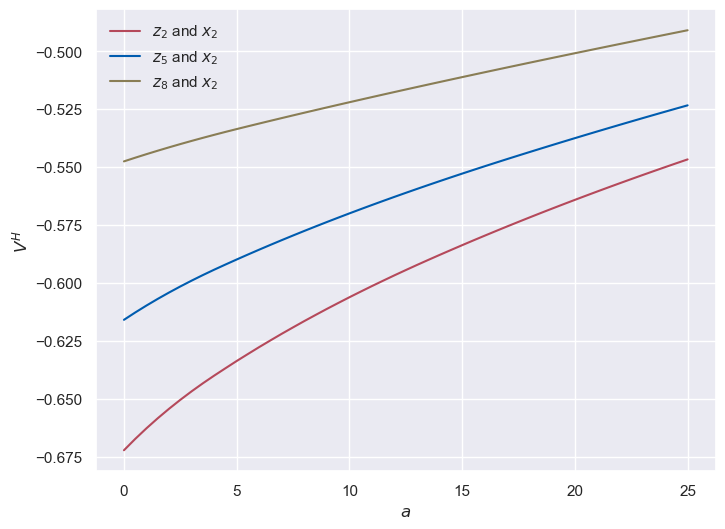

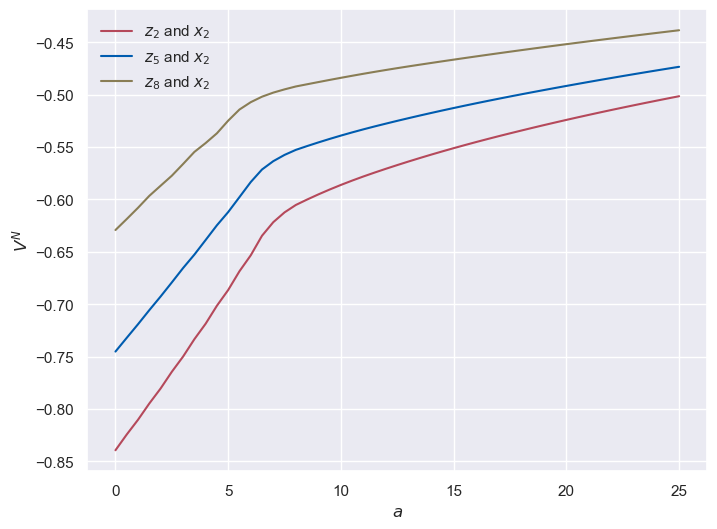

In [40]:
# Plot value function with respect to a
ARM_Economy.plot_value_func(homeownership = 'H',
                            axis = 0,
                            fixed_states =[(2, 2), (5, 2), (8, 2)],
                            fname ='ARM_value_fun_H_wrt_a.png')
ARM_Economy.plot_value_func(homeownership = 'N',
                            axis = 0,
                            fixed_states =[(2, 2), (5, 2), (8, 2)],
                            fname ='ARM_value_func_N_wrt_a.png')

#### Policy function (optimal savings)

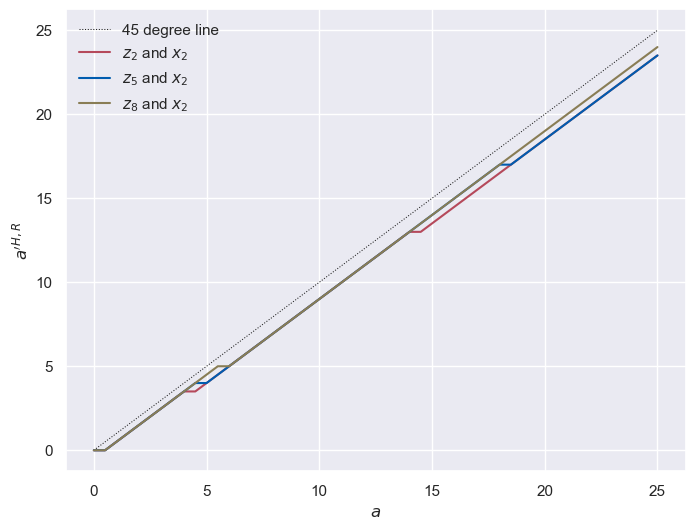

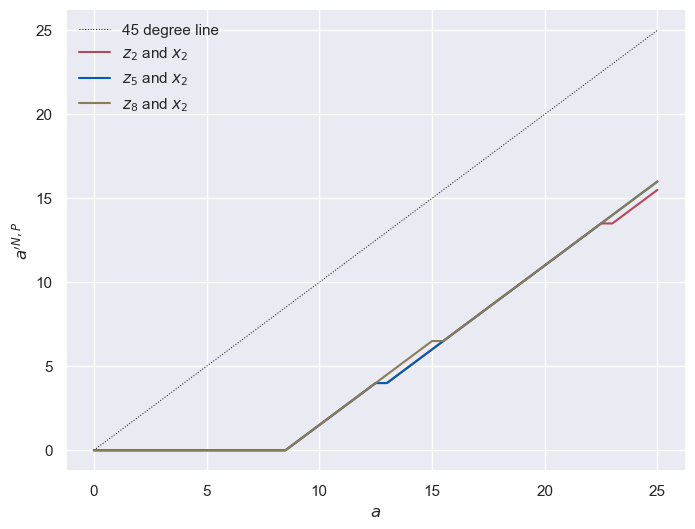

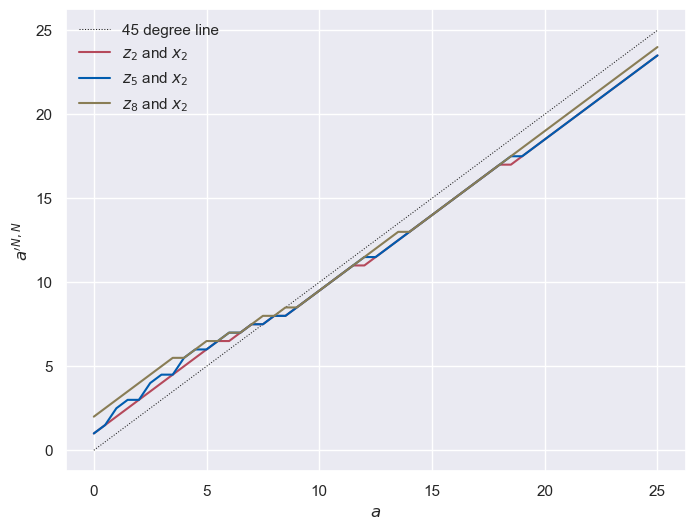

In [41]:
# Plot saving function with respect to a
ARM_Economy.plot_saving_func(type_of_household = 'HR',
                             axis = 0,
                             fixed_states =[(2, 2), (5, 2), (8, 2)],
                             fname ='ARM_saving_func_HR_wrt_a.png')
ARM_Economy.plot_saving_func(type_of_household = 'NP',
                             axis = 0,
                             fixed_states =[(2, 2), (5, 2), (8, 2)],
                             fname ='ARM_saving_func_NP_wrt_a.png')
ARM_Economy.plot_saving_func(type_of_household = 'NN',
                             axis = 0,
                             fixed_states =[(2, 2), (5, 2), (8, 2)],
                             fname ='ARM_saving_func_NN_wrt_a.png')

#### Plocy function (default probability)

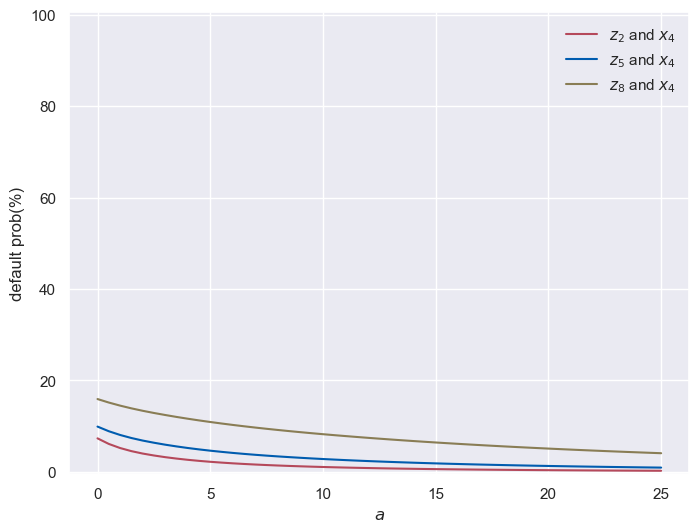

In [42]:
# Plot default probability with respect to a
ARM_Economy.plot_default_prob(axis = 0,
                              fixed_states =[(2, 4), (5, 4), (8, 4)],
                              fname ='ARM_prob_D_wrt_a.png')

#### Policy function (probability of purchasing a house)

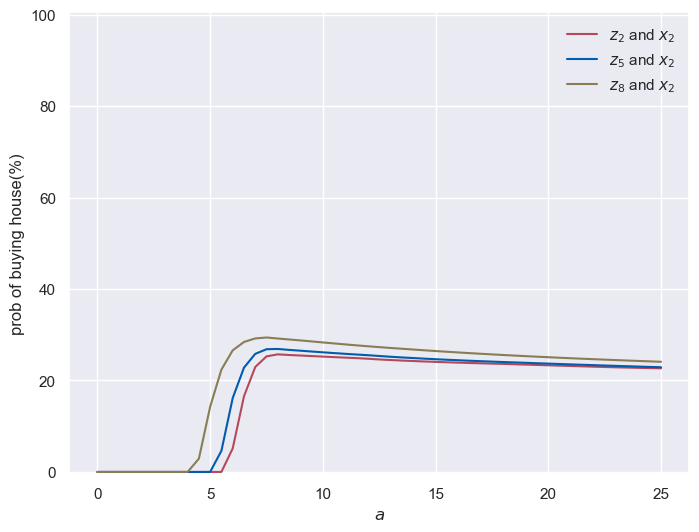

In [43]:
# Plot probability of buying house with respect to a
ARM_Economy.plot_purchase_prob(axis = 0,
                              fixed_states =[(2, 2), (5, 2), (8, 2)],
                              fname ='ARM_prob_P_wrt_a.png')

#### Equilibrium mortgage rate

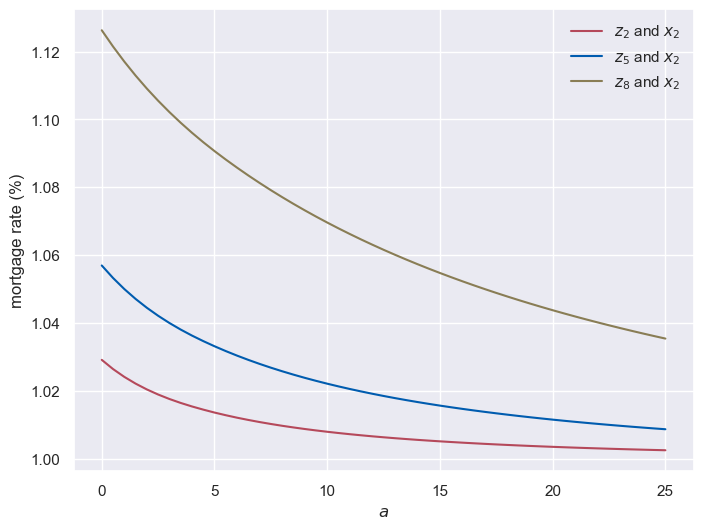

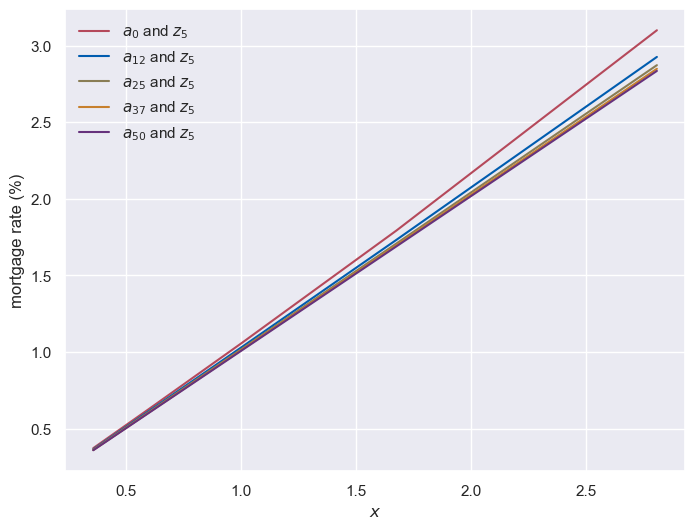

In [44]:
# Plot mortgage rate with respect to a
ARM_Economy.plot_mortgage_rate(axis = 0,
                               fixed_states =[(2, 2), (5, 2), (8, 2)],
                               fname ='ARM_mortgage_rate.png')
# Plot mortgage rate with respect to x
ARM_Economy.plot_mortgage_rate(axis = 2,
                               fixed_states =[(0, 5), (12, 5), (25, 5), (37, 5), (50, 5)],
                               fname ='ARM_mortgage_rate.png')

### (C) Solve for the stationary distribution

Let's solve for the stationary distribution by iterating the PDF.

In [45]:
# Solve for the stationary distribution
ARM_Economy.get_stationary_dist_by_iter()

Starting to calculate the stationary distribution...
elapsed time = 0:00:00.040081



#### The share of homeowners in the stationsry distribution

Share of homeowners: 67.402 %


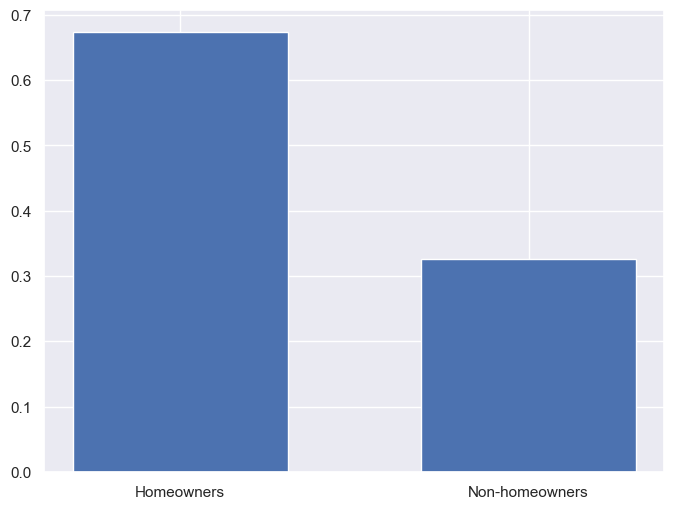

In [46]:
ARM_Economy.plot_homeownership(fname = 'ARM_homeownership.png')

#### Stationary distribution

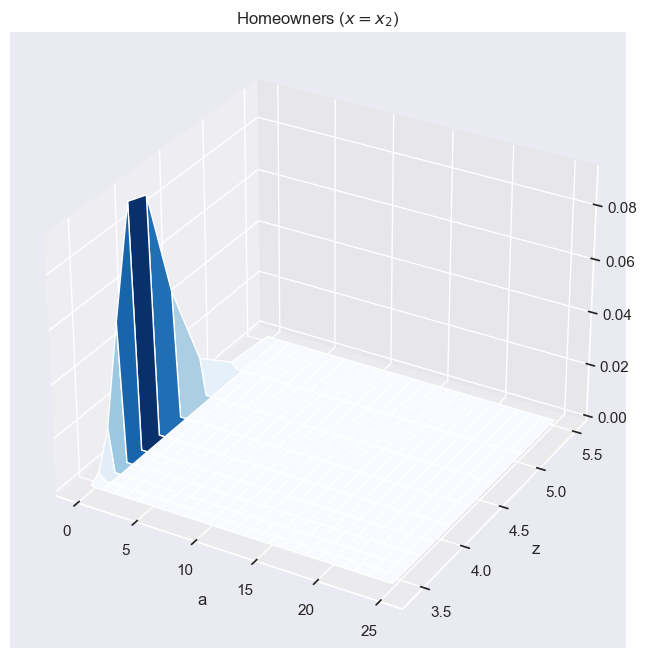

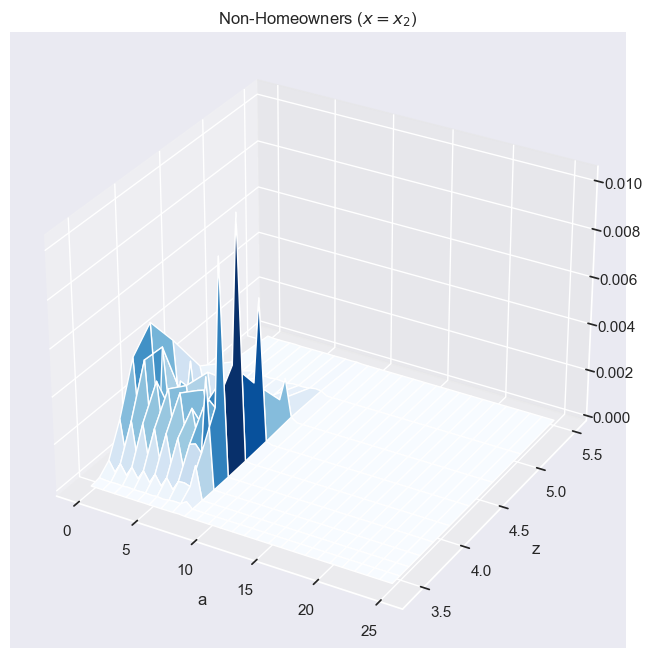

In [47]:
ARM_Economy.plot_stationary_distribution(homeownership = 'H',
                                         fixed_axis = 2,
                                         fixed_state_id = 2,
                                         zlim = None,
                                         fname = 'ARM_stationary_dist_H.png')
ARM_Economy.plot_stationary_distribution(homeownership = 'N',
                                         fixed_axis = 2,
                                         fixed_state_id = 2,
                                         zlim = None,
                                         fname = 'ARM_stationary_dist_N.png')

### (D) Implement $x$ shock simulation

In this simulation, the economy is assumed born with the stationary distribution conditional on $x = x_2 (= 1)$. At $t = 0$, $x$ hikes to the worst value $x_4$. And, in the following period, $x$ reduces to $x_3$. After that, $x$ keeps constant at $x_2$.

In [48]:
ARM_Economy.x_shock_simulation(pre_shock_x_idx = 2, x_idx_path = x_path)

## Step 3. Solve the (partially) fixed-rate model

### (A) Declare the economy

In [49]:
# Generate the instance for the (partially) fixed-rate economy
FRM_Economy = FRM_FixedHousePrice(z_grid = z_grid,
                                  x_grid = x_grid,
                                  trans_prob_z = trans_prob_z,
                                  trans_prob_x = trans_prob_x,)

### (B) Solve the Bellman equation

In [50]:
# Run the value iteration (it may take a few mins depending on # of grid points)
FRM_Economy.value_func_iter()

Starting the value function iteration...
elapsed time = 0:01:15.118829



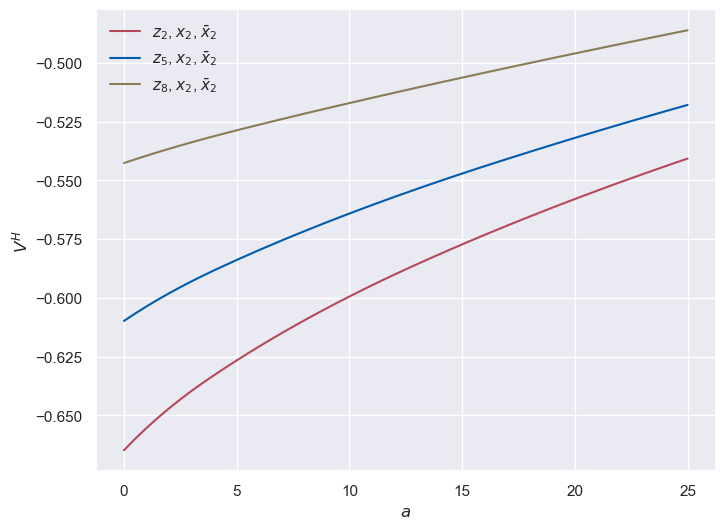

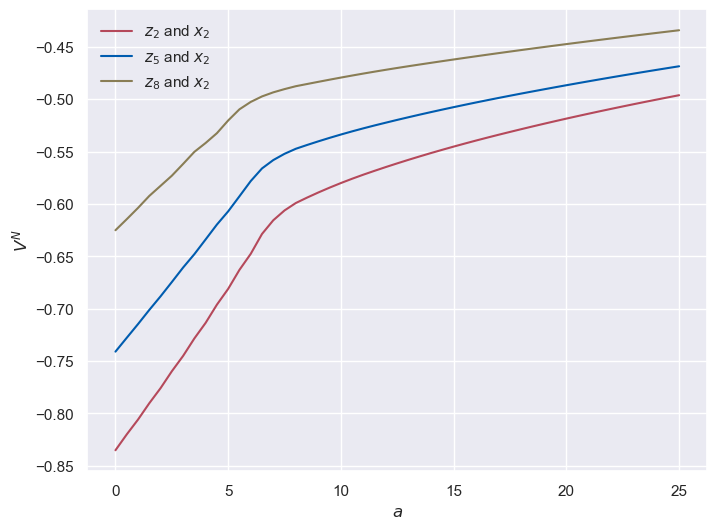

In [51]:
# Plot value function with respect to a
FRM_Economy.plot_value_func(homeownership = 'H',
                            axis = 0,
                            fixed_states =[(2, 2, 2), (5, 2, 2), (8, 2, 2)],
                            fname ='FRM_value_func_homeowner_wrt_a.png')
FRM_Economy.plot_value_func(homeownership = 'N',
                            axis = 0,
                            fixed_states =[(2, 2), (5, 2), (8, 2)],
                            fname ='FRM_value_func_nonhomeowner_wrt_a.png')

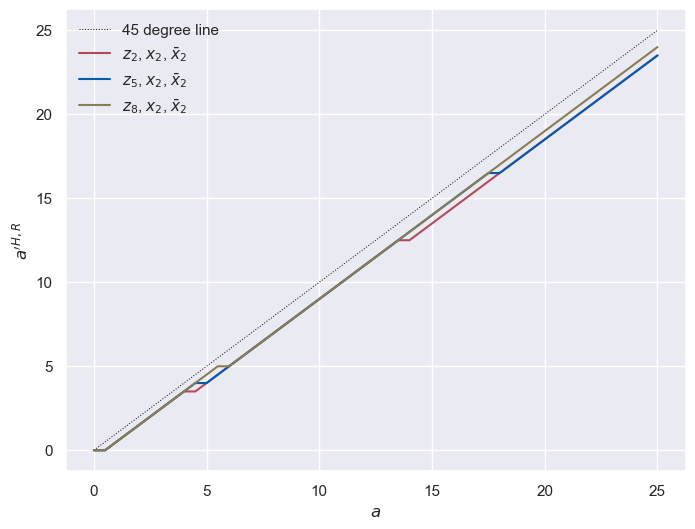

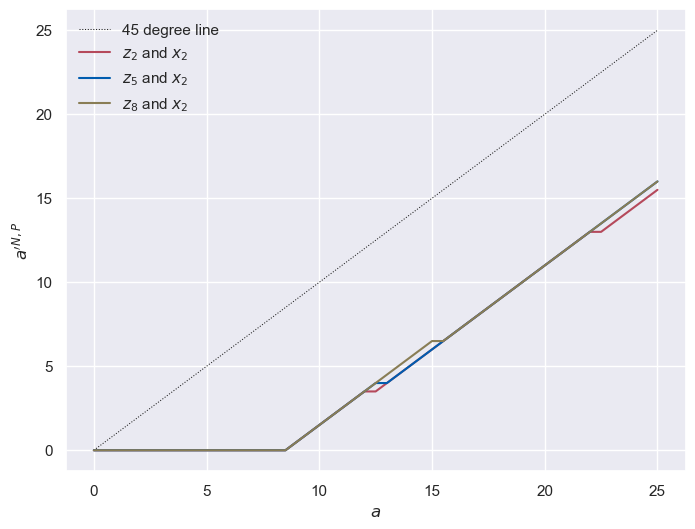

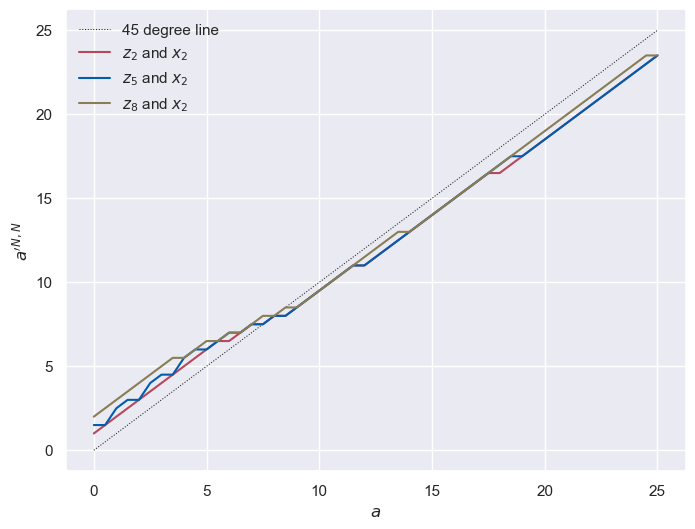

In [52]:
# Plot saving function with respect to a
FRM_Economy.plot_saving_func(type_of_household = 'HR',
                             axis = 0,
                             fixed_states =[(2, 2, 2), (5, 2, 2), (8, 2, 2)],
                             fname ='FRM_saving_func_HR_wrt_a.png')
FRM_Economy.plot_saving_func(type_of_household = 'NP',
                             axis = 0,
                             fixed_states =[(2, 2), (5, 2), (8, 2)],
                             fname ='FRM_saving_func_NP_wrt_a.png')
FRM_Economy.plot_saving_func(type_of_household = 'NN',
                             axis = 0,
                             fixed_states =[(2, 2), (5, 2), (8, 2)],
                             fname ='FRM_saving_func_NP_wrt_a.png')

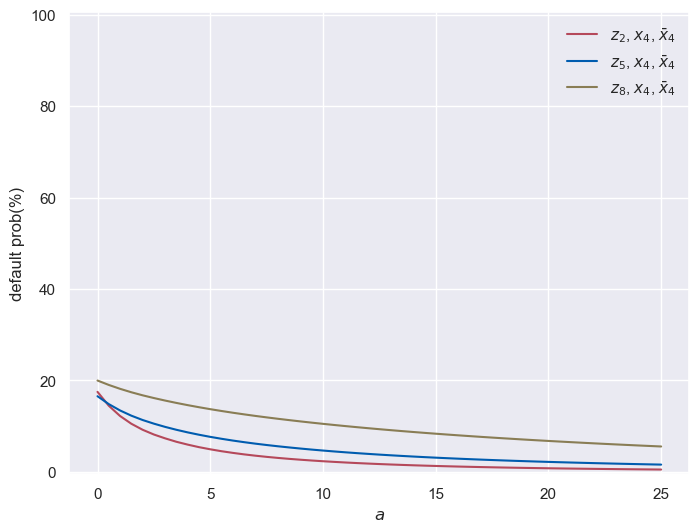

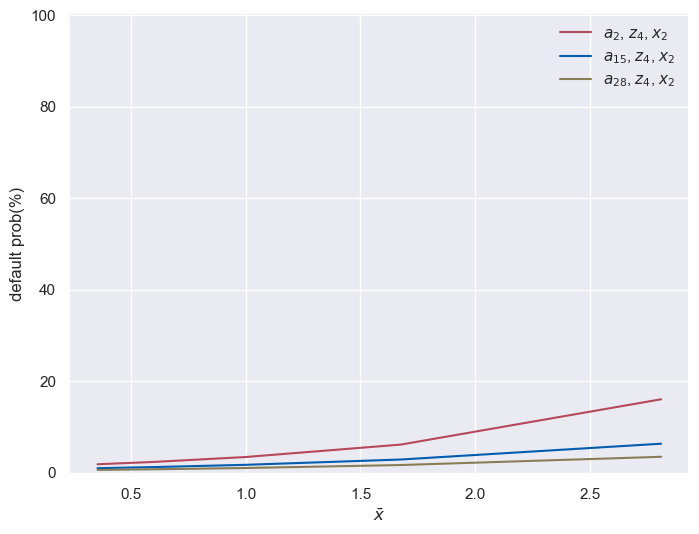

In [53]:
# Plot default probability with respect to a
FRM_Economy.plot_default_prob(axis = 0,
                              fixed_states =[(2, 4, 4), (5, 4, 4), (8, 4, 4)],
                              fname ='FRM_prob_D_wrt_a.png')
FRM_Economy.plot_default_prob(axis = 4,
                              fixed_states =[(2, 4, 2), (15, 4, 2), (28, 4, 2)],
                              fname ='FRM_prob_D_wrt_own_z.png')

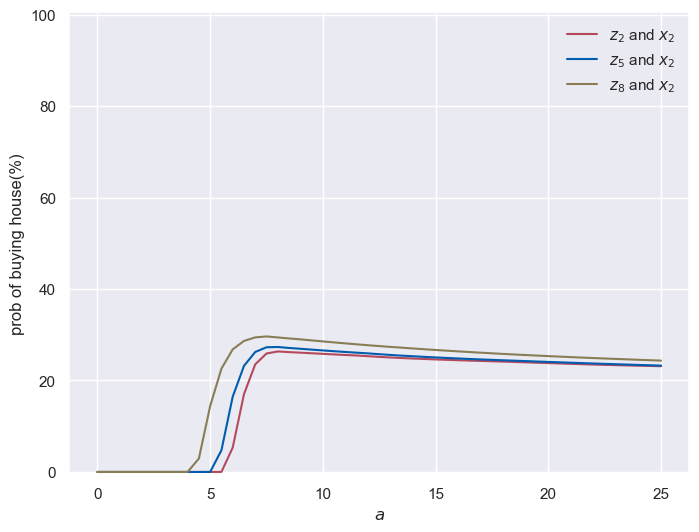

In [54]:
# Plot probability of buying house with respect to a
FRM_Economy.plot_purchase_prob(axis = 0,
                               fixed_states =[(2, 2), (5, 2), (8, 2)],
                               fname ='FRM_prob_P_wrt_a.png')

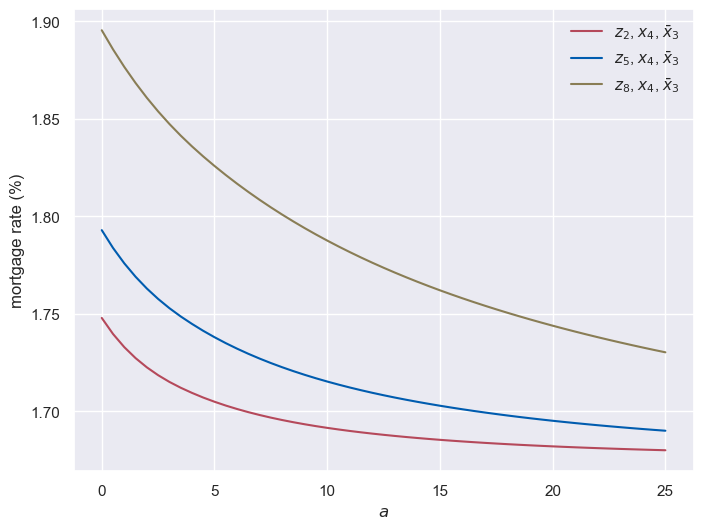

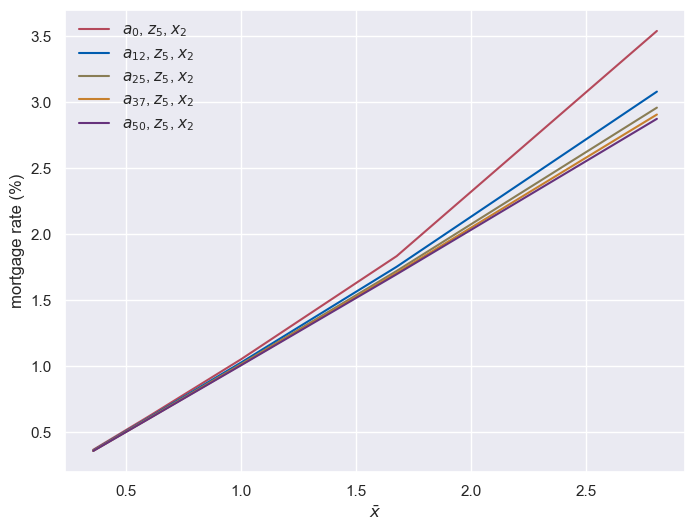

In [55]:
# Plot mortgage rate with respect to a
FRM_Economy.plot_mortgage_rate(axis = 0,
                               fixed_states =[(2, 4, 3), (5, 4, 3), (8, 4, 3)],
                               fname ='ARM_mortgage_rate.png')
# Plot mortgage rate with respect to x
FRM_Economy.plot_mortgage_rate(axis = 3,
                               fixed_states =[(0, 5, 2), (12, 5, 2), (25, 5, 2), (37, 5, 2), (50, 5, 2)],
                               fname ='ARM_mortgage_rate.png')

### (C) Solve for the stationary distribution

In [56]:
# Solve for the stationary distribution
FRM_Economy.get_stationary_dist_by_iter()

Starting to calculate the stationary distribution...
elapsed time = 0:00:00.391638



Share of homeowners: 69.799 %


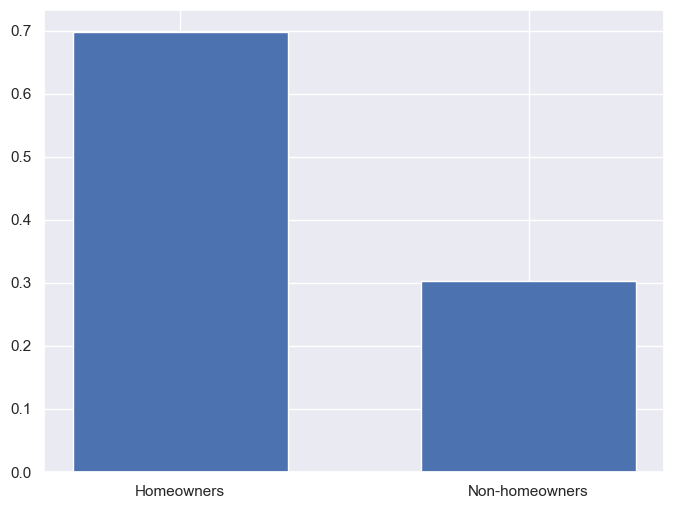

In [57]:
FRM_Economy.plot_homeownership(fname = 'FRM_homeownership.png')

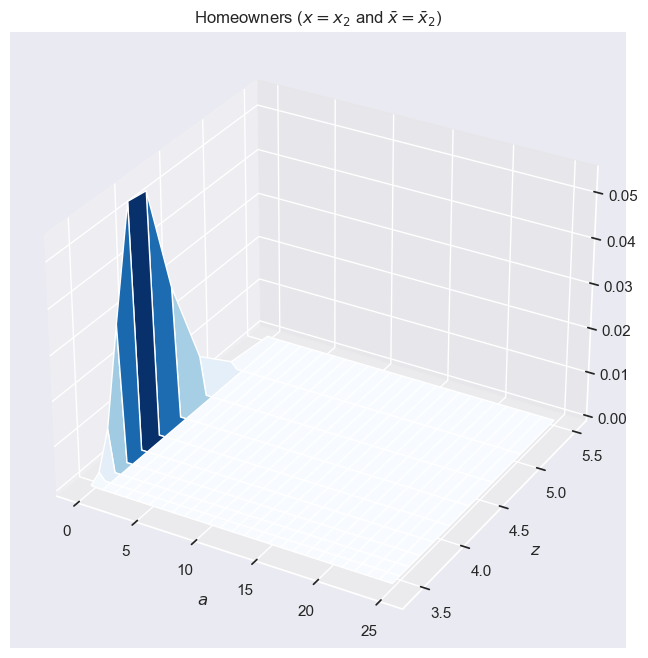

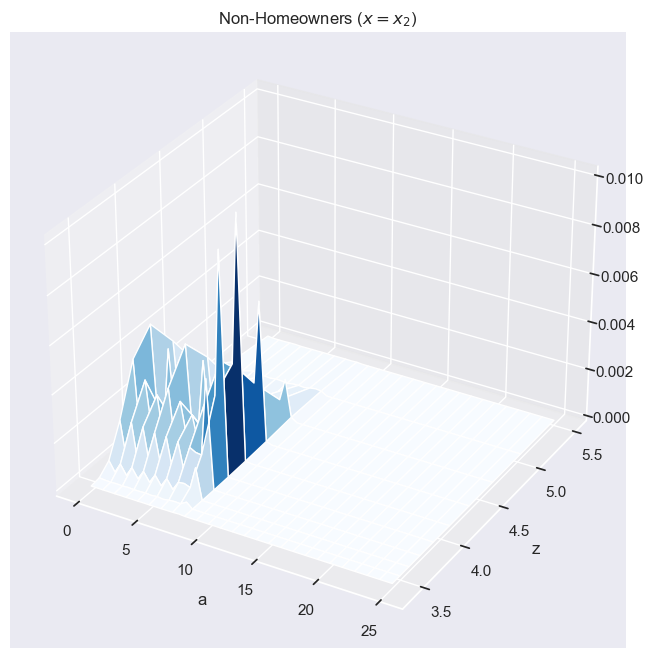

In [58]:
FRM_Economy.plot_stationary_distribution(homeownership = 'H',
                                         fixed_axis = (2, 3),
                                         fixed_state_id = (2, 2),
                                         zlim = None,
                                         fname = 'FRM_stationary_dist_H.png')
FRM_Economy.plot_stationary_distribution(homeownership = 'N',
                                         fixed_axis = 2,
                                         fixed_state_id = 2,
                                         zlim = None,
                                         fname = 'FRM_stationary_dist_N.png')

### (D) Implement $x$ shock simulation

In [59]:
FRM_Economy.x_shock_simulation(pre_shock_x_idx = 2, x_idx_path = x_path)

## Step 4. Model comparison

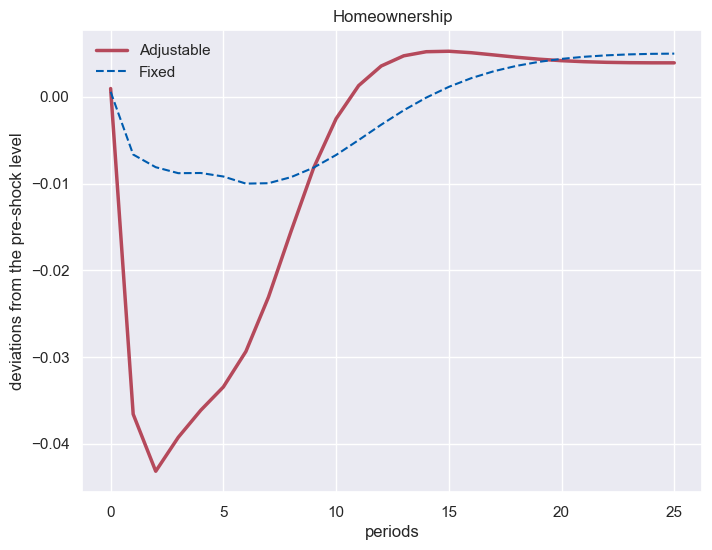

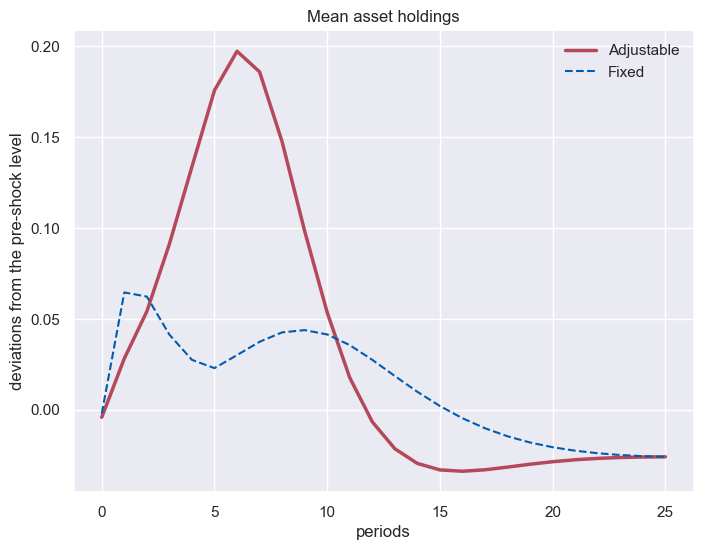

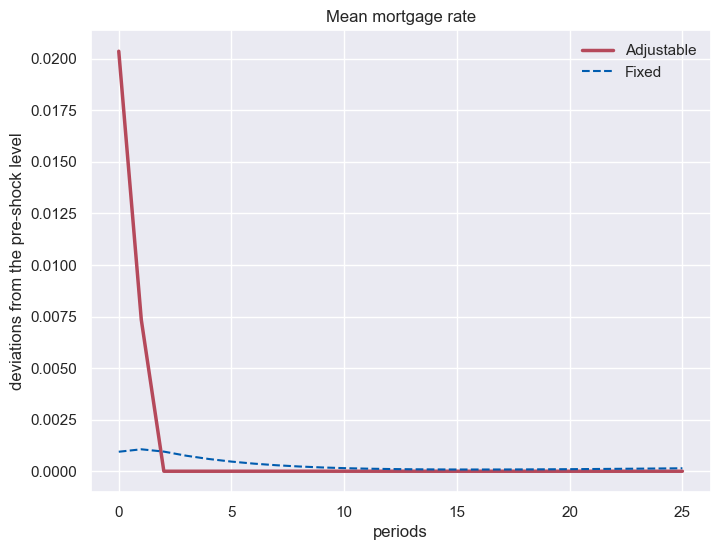

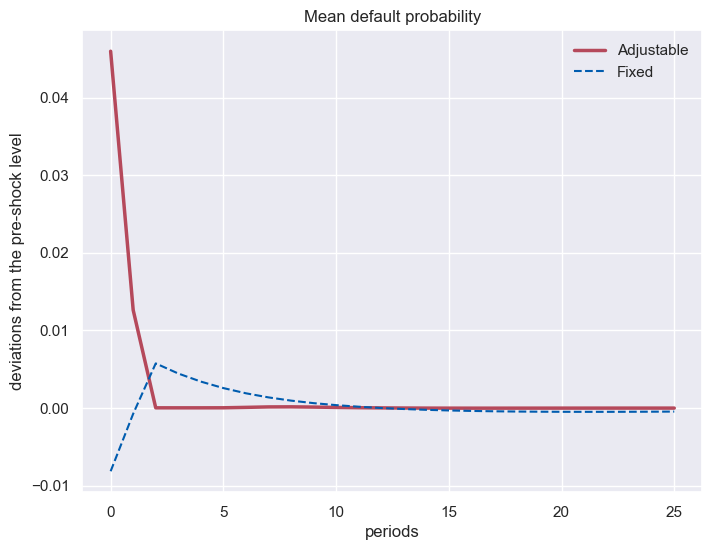

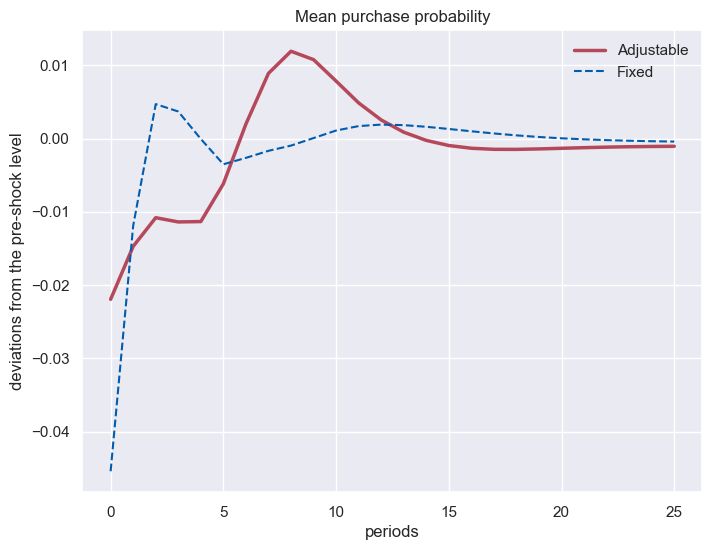

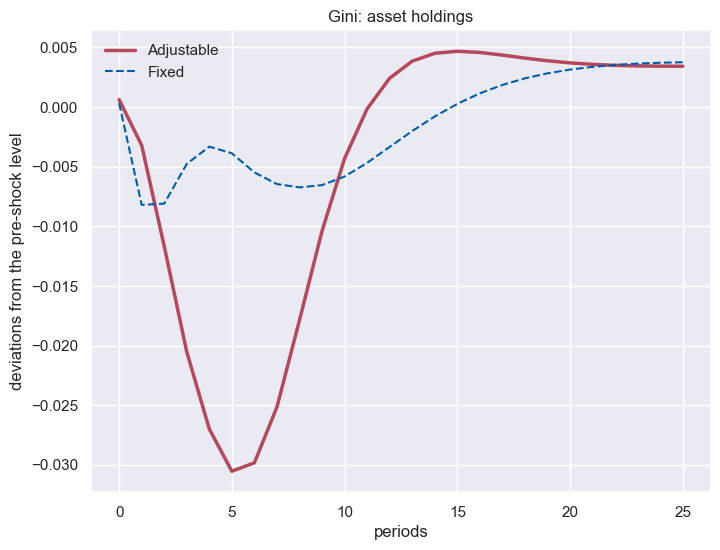

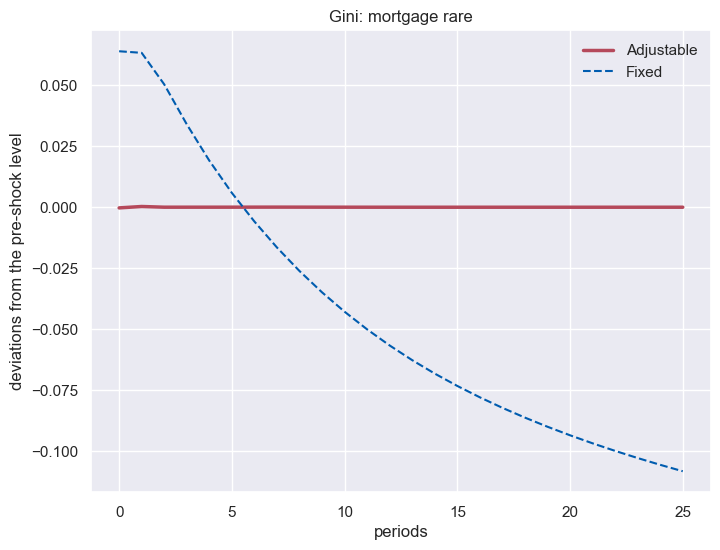

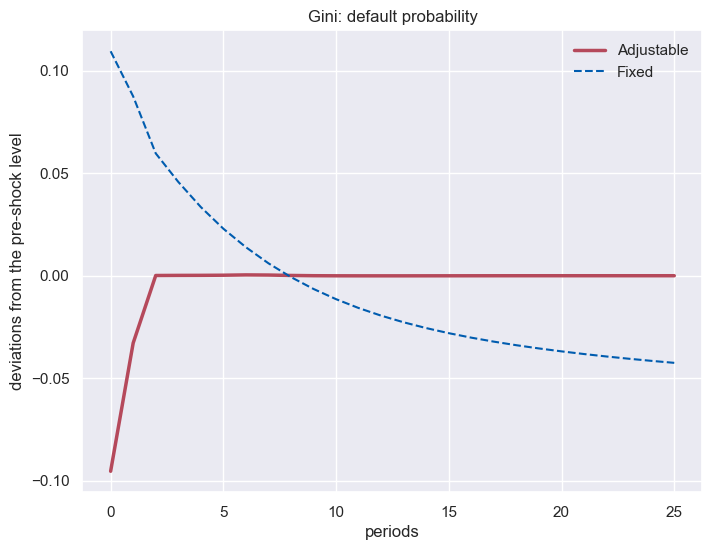

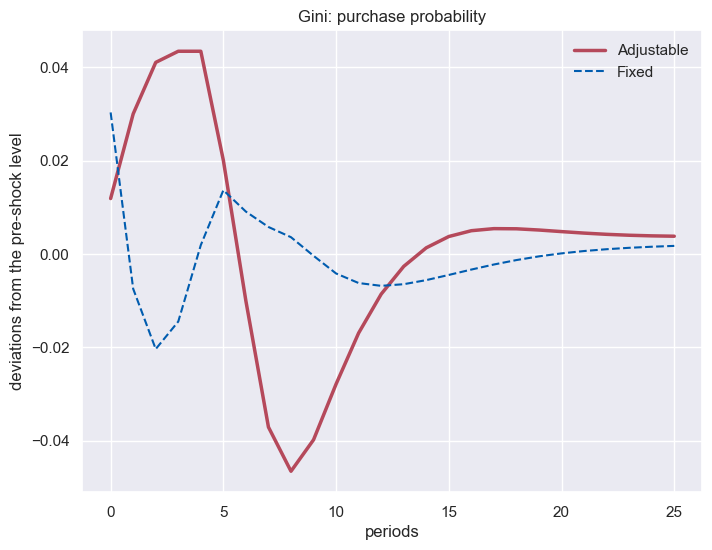

In [60]:
compare_irfs(ARM_Economy, FRM_Economy, T_max = 25, plot_in_deviations = True)